In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

In [2]:
df=pd.read_csv('Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

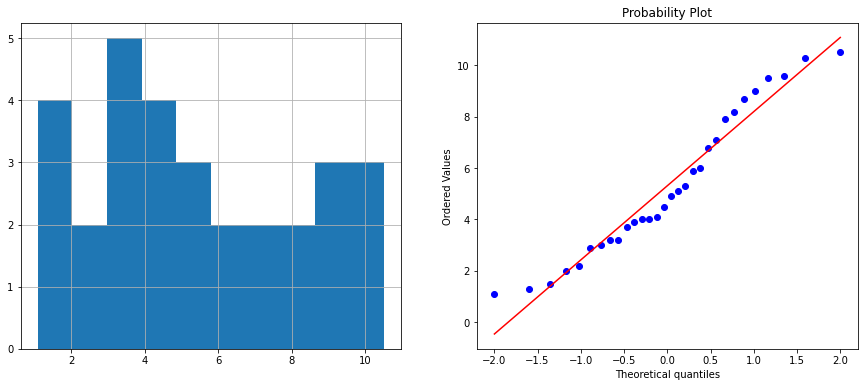

In [7]:
diagnostic_plots(df, 'YearsExperience')

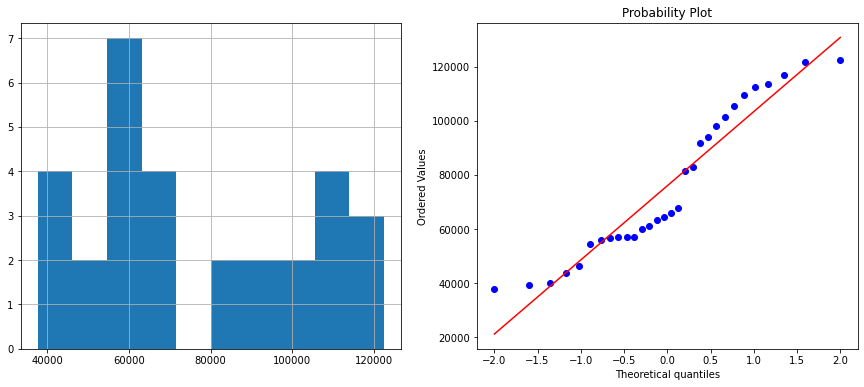

In [8]:
diagnostic_plots(df, 'Salary')

In [9]:
import statsmodels.formula.api as smf
model1=smf.ols("YearsExperience~Salary",data=df).fit()

In [10]:
model1.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [11]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        10:49:41   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Predicted values of Salary using the model1
pred1= model1.predict(df)

Text(0, 0.5, 'Years Experience')

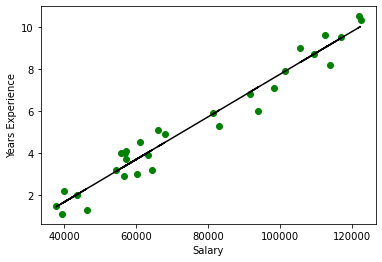

In [13]:
plt.scatter(x=df.Salary, y=df.YearsExperience, color='green')
plt.plot(df.Salary, pred1,color='black')
plt.xlabel("Salary")
plt.ylabel("Years Experience")

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

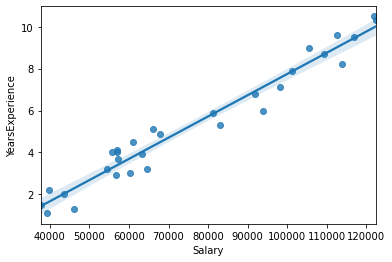

In [14]:
sns.regplot(x=df.Salary, y=df.YearsExperience, data=df)

# Logarithmic Transformation

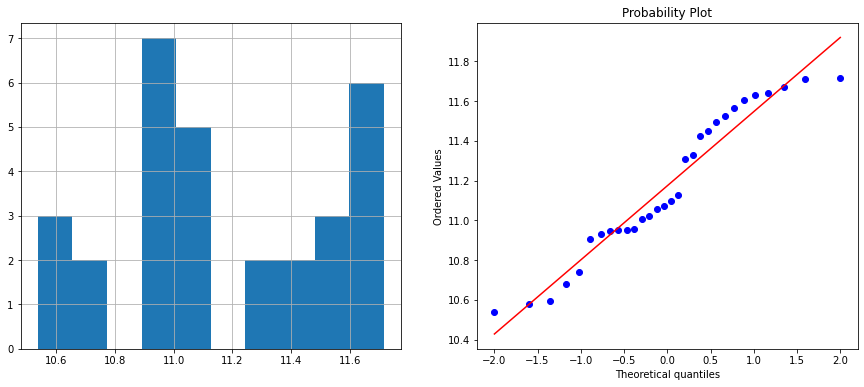

In [15]:
df['Log_salary']=np.log(df['Salary']+1)
diagnostic_plots(df,'Log_salary')

In [16]:
import statsmodels.formula.api as smf
model2=smf.ols("YearsExperience~Log_salary",data=df).fit()

In [17]:
model2.params

Intercept    -77.697495
Log_salary     7.428934
dtype: float64

In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           7.03e-18
Time:                        10:49:44   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -77.6975      4.241    -18.322      0.000     -86.384     -69.011
Log_salary     7.4289      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Predicted values of Salary using the model2
pred2 = model2.predict(df)

Text(0, 0.5, 'Years Experience')

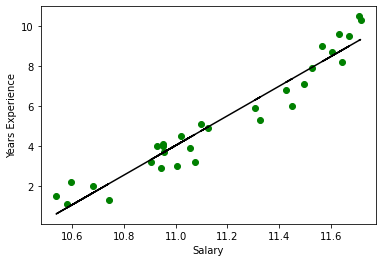

In [20]:
plt.scatter(x=df.Log_salary, y=df.YearsExperience, color='green')
plt.plot(df.Log_salary, pred2,color='black')
plt.xlabel("Salary")
plt.ylabel("Years Experience")

<AxesSubplot:xlabel='Log_salary', ylabel='YearsExperience'>

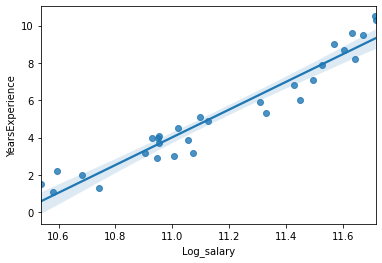

In [21]:
sns.regplot(x=df.Log_salary, y=df.YearsExperience, data=df)


# Reciprocal Transformation

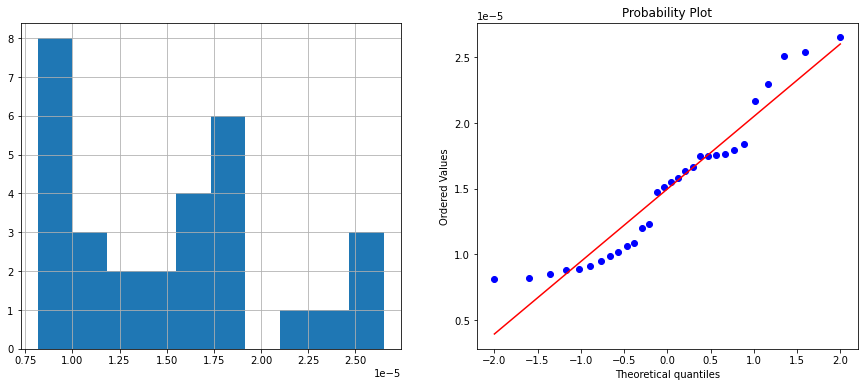

In [22]:
df['Rec_Salary']=1/(df['Salary']+1)
diagnostic_plots(df,'Rec_Salary')

In [23]:
import statsmodels.formula.api as smf
model3=smf.ols("YearsExperience~Rec_Salary",data=df).fit()

In [24]:
model3.params

Intercept         12.480710
Rec_Salary   -478449.177816
dtype: float64

In [25]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     173.3
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.63e-13
Time:                        10:49:47   Log-Likelihood:                -43.766
No. Observations:                  30   AIC:                             91.53
Df Residuals:                      28   BIC:                             94.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4807      0.579     21.557      0.000      11.295      13.667
Rec_Salary -4.784e+05   3.63e+04    -13.162      0.000   -5.53e+05   -4.04e+05
==============================================================================
Omnibus:                        1.686   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.239
Skew:                           0.262   Prob(JB):                        0.538
Kurtosis:                       2.153   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Predicted values of Salary using the model3
pred3 = model3.predict(df)

Text(0, 0.5, 'Years Experience')

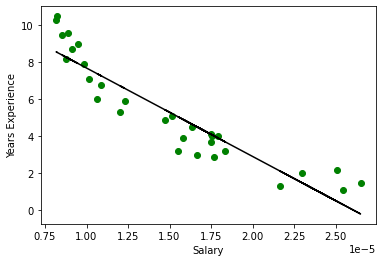

In [27]:
plt.scatter(x=df.Rec_Salary, y=df.YearsExperience, color='green')
plt.plot(df.Rec_Salary, pred3,color='black')
plt.xlabel("Salary")
plt.ylabel("Years Experience")

<AxesSubplot:xlabel='Rec_Salary', ylabel='YearsExperience'>

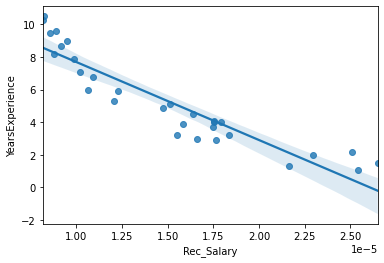

In [28]:
sns.regplot(x=df.Rec_Salary, y=df.YearsExperience, data=df)

# Square root Transformation

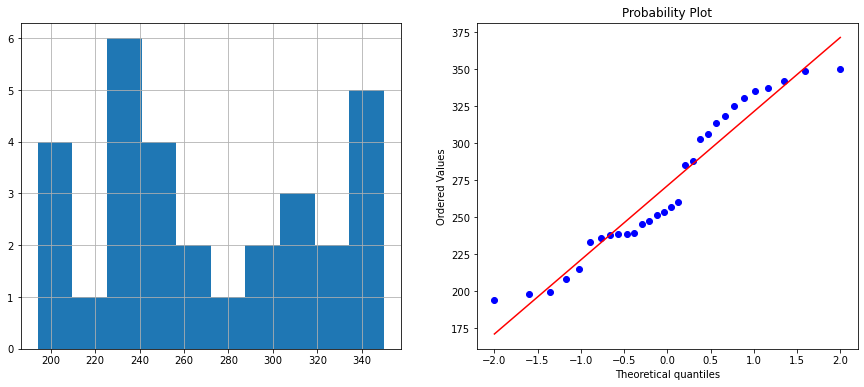

In [29]:
df['sqr_Salary']=df['Salary']**(1/2)
diagnostic_plots(df,'sqr_Salary')

In [30]:
import statsmodels.formula.api as smf
model4=smf.ols("YearsExperience~sqr_Salary",data=df).fit()

In [31]:
model4.params

Intercept    -9.796199
sqr_Salary    0.055687
dtype: float64

In [32]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           9.78e-20
Time:                        10:49:51   Log-Likelihood:                -28.465
No. Observations:                  30   AIC:                             60.93
Df Residuals:                      28   BIC:                             63.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.7962      0.667    -14.692      0.000     -11.162      -8.430
sqr_Salary     0.0557      0.002     23.025      0.000       0.051       0.061
==============================================================================
Omnibus:                        3.569   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.215
Skew:                          -0.451   Prob(JB):                        0.330
Kurtosis:                       2.021   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# Predicted values of Salary using the model4
pred4 = model4.predict(df)

Text(0, 0.5, 'Years Experience')

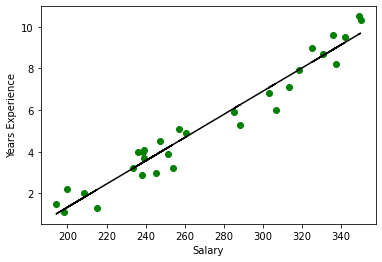

In [34]:
plt.scatter(x=df.sqr_Salary, y=df.YearsExperience, color='green')
plt.plot(df.sqr_Salary, pred4,color='black')
plt.xlabel("Salary")
plt.ylabel("Years Experience")

<AxesSubplot:xlabel='sqr_Salary', ylabel='YearsExperience'>

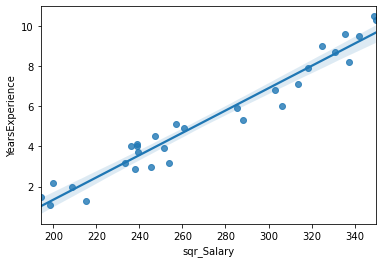

In [35]:
sns.regplot(x=df.sqr_Salary, y=df.YearsExperience, data=df)

# Exponential Transformation

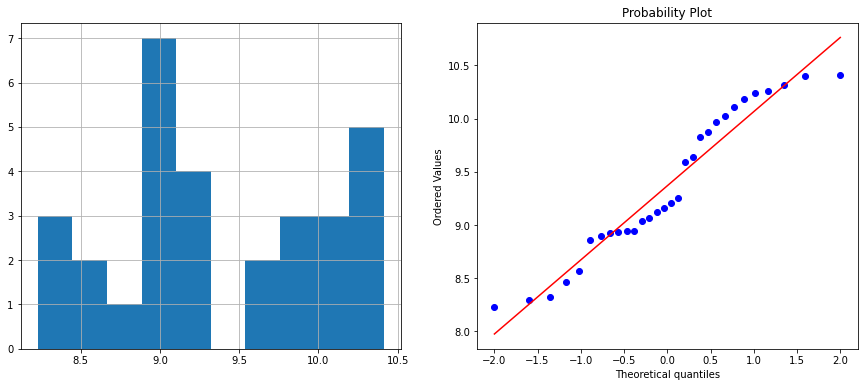

In [36]:
df['Exp_Salary']=df['Salary']**(1/5)
diagnostic_plots(df,'Exp_Salary')

In [37]:
import statsmodels.formula.api as smf
model5=smf.ols("YearsExperience~Exp_Salary",data=df).fit()

In [38]:
model5.params

Intercept    -32.077629
Exp_Salary     3.990868
dtype: float64

In [39]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     442.6
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.07e-18
Time:                        10:49:54   Log-Likelihood:                -31.024
No. Observations:                  30   AIC:                             66.05
Df Residuals:                      28   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.0776      1.782    -18.002      0.000     -35.728     -28.428
Exp_Salary     3.9909      0.190     21.038      0.000       3.602       4.379
==============================================================================
Omnibus:                        2.461   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                1.620
Skew:                          -0.338   Prob(JB):                        0.445
Kurtosis:                       2.084   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Predicted values of Salary using the model5
pred5 = model5.predict(df) 

Text(0, 0.5, 'Years Experience')

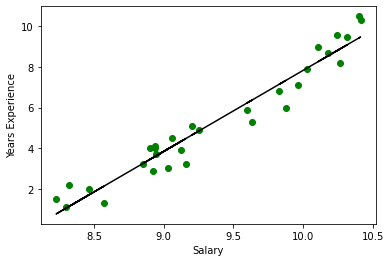

In [41]:
plt.scatter(x=df.Exp_Salary, y=df.YearsExperience, color='green')
plt.plot(df.Exp_Salary, pred5,color='black')
plt.xlabel("Salary")
plt.ylabel("Years Experience")

<AxesSubplot:xlabel='Exp_Salary', ylabel='YearsExperience'>

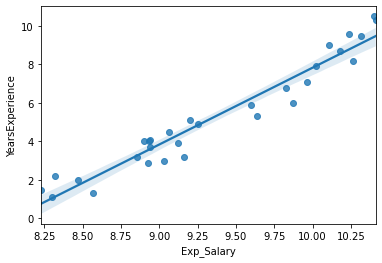

In [42]:
sns.regplot(x=df.Exp_Salary, y=df.YearsExperience, data=df)

# BoxCox

Optimal lambda:  0.07277249141043911


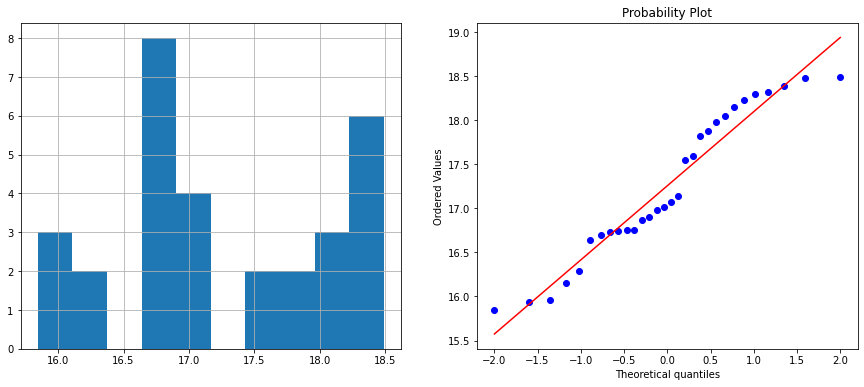

In [43]:
df['boxcox_salary'], param = stats.boxcox(df.Salary+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'boxcox_salary')

In [44]:
import statsmodels.formula.api as smf
model6=smf.ols("YearsExperience~boxcox_salary",data=df).fit()

In [45]:
model6.params

Intercept       -51.653802
boxcox_salary     3.301181
dtype: float64

In [46]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     404.7
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           3.48e-18
Time:                        10:49:58   Log-Likelihood:                -32.283
No. Observations:                  30   AIC:                             68.57
Df Residuals:                      28   BIC:                             71.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -51.6538      2.835    -18.221      0.000     -57.461     -45.847
boxcox_salary     3.3012      0.164     20.118      0.000       2.965       3.637
==============================================================================
Omnibus:                        1.986   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                1.350
Skew:                          -0.270   Prob(JB):                        0.509
Kurtosis:                       2.112   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
 # Predicted values of Salary using the model6
pred6 = model6.predict(df)

Text(0, 0.5, 'Years Experience')

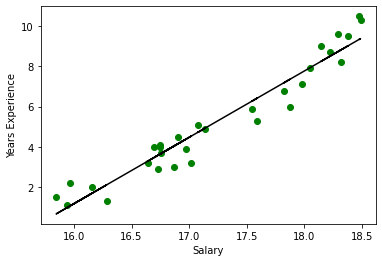

In [48]:
plt.scatter(x=df.boxcox_salary, y=df.YearsExperience, color='green')
plt.plot(df.boxcox_salary, pred6,color='black')
plt.xlabel("Salary")
plt.ylabel("Years Experience")

<AxesSubplot:xlabel='boxcox_salary', ylabel='YearsExperience'>

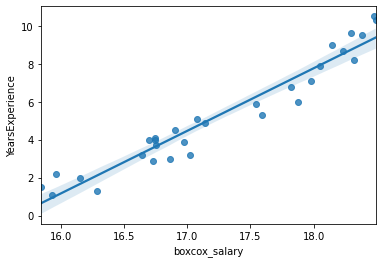

In [49]:
sns.regplot(x=df.boxcox_salary, y=df.YearsExperience, data=df)